##1. EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/data/중고차/train.csv')
test = pd.read_csv('/content/drive/MyDrive/data/중고차/test.csv')
df = pd.concat([train, test], ignore_index = True)
n_train = len(train)
print(n_train)
df.head()

1015


,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000.0
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000.0
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000.0
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000.0
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000.0


In [ ]:
df.tail()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
1446,431,Mercedes-Benz GLK 350,78175,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Dark Blue,2014,NaN
1447,432,Honda Crosstour,129223,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2011,NaN
1448,433,Mercedes-Benz ML 350,100943,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black,2013,NaN
1449,434,Lexus GX 470,81463,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Mint green,2003,NaN
1450,435,Toyota Sienna,646,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Silver,2006,NaN


In [ ]:
# 결측치 확인
df.isnull().sum()

id                0
title             0
odometer          0
location          0
isimported        0
engine            0
transmission      0
fuel              0
paint             0
year              0
target          436
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451 entries, 0 to 1450
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1451 non-null   int64  
 1   title         1451 non-null   object 
 2   odometer      1451 non-null   int64  
 3   location      1451 non-null   object 
 4   isimported    1451 non-null   object 
 5   engine        1451 non-null   object 
 6   transmission  1451 non-null   object 
 7   fuel          1451 non-null   object 
 8   paint         1451 non-null   object 
 9   year          1451 non-null   int64  
 10  target        1015 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 124.8+ KB


In [ ]:
# title 데이터 형태 확인 -> 회사명과 차종 구분 할 필요 있음.
df['title'].unique()

array(['Toyota RAV 4', 'Toyota Land Cruiser',
       'Land Rover Range Rover Evoque', 'Lexus ES 350', 'Toyota Venza',
       'Toyota Corolla', 'Land Rover Range Rover Sport', 'Pontiac Vibe',
       'Toyota Tacoma', 'Lexus RX 350', 'Ford Escape', 'Honda Civic',
       'Volvo XC90', 'BMW 750', 'Infiniti JX', 'Honda Accord',
       'Mercedes-Benz ML 350', 'Toyota Camry', 'Hyundai Azera',
       'Lexus GX 460', 'BMW 325', 'Toyota Sienna', 'Honda Fit',
       'Honda CR-V', 'Hyundai Tucson', 'Ford Transit', 'Jaguar XJ8',
       'BMW X6', 'Mercedes-Benz C 300', 'Mitsubishi Galant',
       'Mercedes-Benz GL 450', 'Lexus RX 300', 'Toyota Highlander',
       'Mitsubishi CANTER PICK UP', 'Nissan Titan', 'Lexus IS 250',
       'Mercedes-Benz 200', 'Toyota Sequoia', 'Ford Explorer',
       'Hyundai ix35', 'Mack CH613 CONVENTIONAL CAB', 'Lexus CT 200h',
       'Lexus LX 570', 'Toyota Avensis', 'Toyota 4-Runner',
       'Mercedes-Benz GLE 350', 'Mercedes-Benz E 300', 'Toyota Avalon',
       'Chevrole

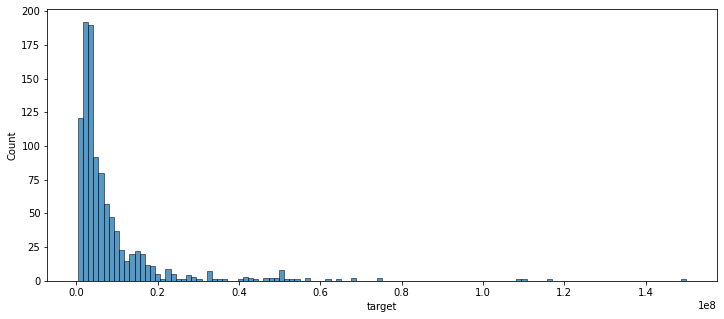

In [ ]:
# 가격 분포 확인
plt.figure(figsize=(12,5))
sns.histplot(data = df[:n_train], x = 'target')
plt.show() # 로그스케일 필요

In [ ]:
# log스케일 위해 타겟값에 0 있는지 확인 -> 없음
df[df['target']==0]

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target


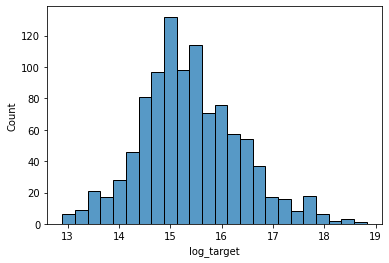

In [ ]:
# log scaled target
df['log_target'] = np.log(df['target'])
sns.histplot(data = df, x='log_target')

<function matplotlib.pyplot.show>

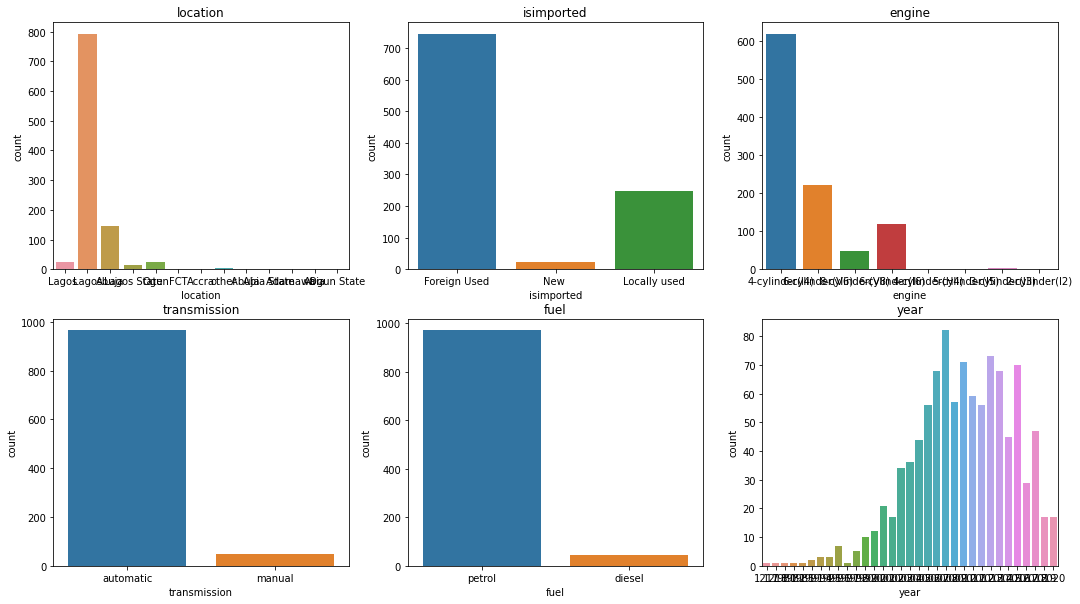

In [ ]:
# 범주형 데이터 분포 확인
plt.figure(figsize=(18,10))
noms = ['location', 'isimported', 'engine', 'transmission', 'fuel', 'year']
for i,col in enumerate(noms) :
  plt.subplot(2,3,i+1)
  sns.countplot(data=df[:n_train], x= col)
  plt.title(col)
plt.show

In [ ]:
# location 데이터 정리 필요.
df['location'].unique()

array(['Lagos ', 'Lagos', 'Abuja', 'Lagos State', 'Ogun', 'FCT', 'Accra',
       'other', 'Abuja ', 'Abia State', 'Adamawa ', 'Abia', 'Ogun State',
       'Mushin', 'Arepo ogun state '], dtype=object)

In [ ]:
# year 피쳐 확인
# train셋
df[:n_train]['year'].unique()
# 1217,1218 이상치 있음

# test셋
df[n_train:]['year'].unique()
# 1324 이상치 있음

array([2017, 2013, 2012, 2001, 2000, 2003, 2006, 2020, 2016, 2011, 2010,
       2008, 2007, 1997, 2009, 2004, 2014, 2002, 1998, 2018, 2019, 2015,
       1993, 2005, 1996, 1994, 1999, 1987, 1324, 2626, 1726])

<function matplotlib.pyplot.show>

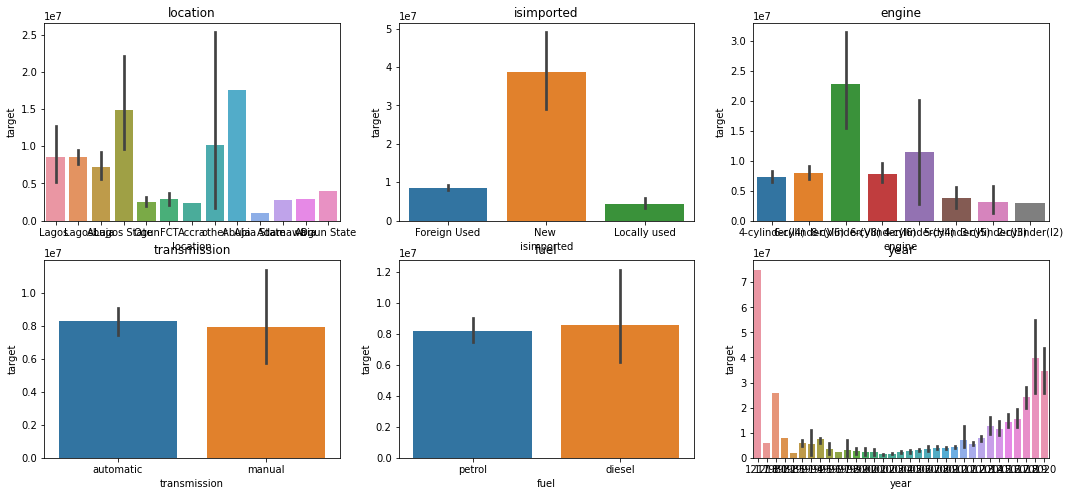

In [ ]:
# 범주형 데이터와 traget 분포 확인
plt.figure(figsize=(18,8))
for i,col in enumerate(noms) :
  plt.subplot(2,3,i+1)
  sns.barplot(data=df[:n_train], x= col, y = 'target')
  plt.title(col)
plt.show

In [ ]:
# fuel과 transmission 상관관계 확인 -> 상관관계 매우 높음 -> pca 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['fuel'] = le.fit_transform(df['fuel'])
df['transmission'] = le.fit_transform(df['transmission'])

df.corr()

,id,odometer,transmission,fuel,year,target,log_target
id,1.000000,-0.009974,-0.018092,0.003106,-0.012725,0.025104,-0.005925
odometer,-0.009974,1.000000,0.252814,-0.256485,-0.235205,-0.261147,-0.370725
transmission,-0.018092,0.252814,1.000000,-0.917060,-0.199107,-0.005705,0.029983
fuel,0.003106,-0.256485,-0.917060,1.000000,0.204760,-0.006340,-0.059087
year,-0.012725,-0.235205,-0.199107,0.204760,1.000000,-0.042637,0.040439
target,0.025104,-0.261147,-0.005705,-0.006340,-0.042637,1.000000,0.773016
log_target,-0.005925,-0.370725,0.029983,-0.059087,0.040439,0.773016,1.000000


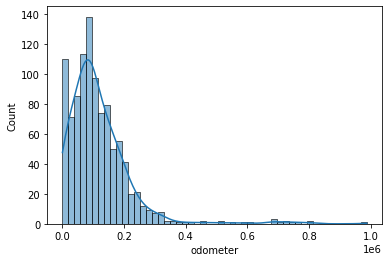

In [ ]:
# 연속형 데이터 분포 확인(주행거리) -> odometer 범주화 하면 좋을듯
sns.histplot(data=df[:n_train], x = 'odometer', kde= True)
plt.show()

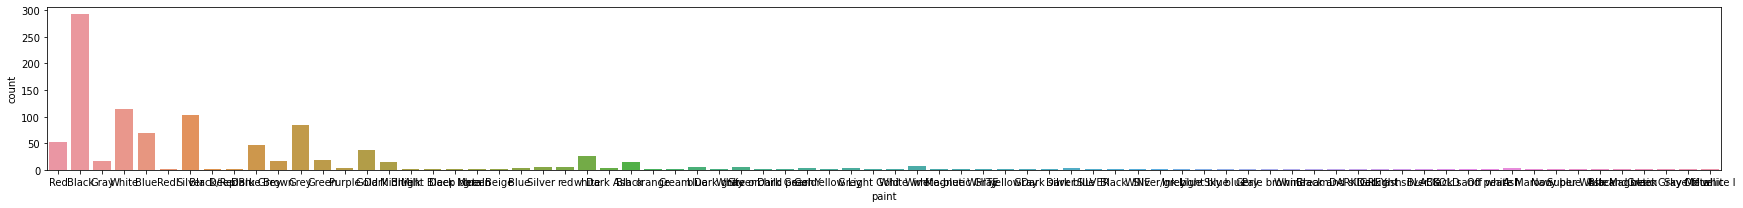

In [ ]:
plt.figure(figsize=(30,3))
sns.countplot(data=df[:n_train], x='paint')
# Black, Red, Gray, White, Blue, Silver Black 가장 많은 색상들.

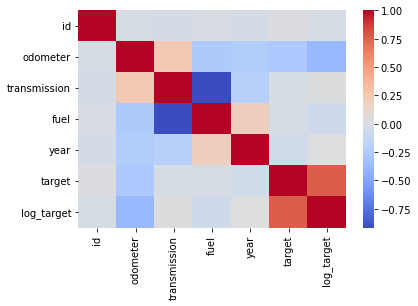

In [ ]:
# 상관관계 히트맵으로 확인
sns.heatmap(df.corr(), cmap = 'coolwarm')
plt.show()

##2. 데이터 전처리

In [ ]:
df['location'].unique()

array(['Lagos ', 'Lagos', 'Abuja', 'Lagos State', 'Ogun', 'FCT', 'Accra',
       'other', 'Abuja ', 'Abia State', 'Adamawa ', 'Abia', 'Ogun State',
       'Mushin', 'Arepo ogun state '], dtype=object)

In [ ]:
# location 에서 많았던 데이터들 위주로 정리
df.replace(['Lagos ','Lagos', 'Lagos State'],['L','L','L'],inplace = True)
df.replace(['Abuja','Abuja '],['A','A'],inplace = True)
df.replace(['Ogun','Ogun State', 'Arepo ogun state '],['O','O','O'],inplace = True)
df.replace(['Abia State','Abia'],['AB','AB'],inplace = True)

In [ ]:
# paint 데이터 정리를 위해 딕셔너리로 바꿔서 정렬
set1 = set(df['paint'].unique())
set1

{'  Brown',
 ' Black',
 ' Black/Red',
 'Ash',
 'Ash and black',
 'BLACK',
 'Beige',
 'Blac',
 'Black',
 'Black ',
 'Black and silver',
 'Black sand pearl',
 'Black.',
 'Blue',
 'Blue ',
 'Brown',
 'Classic Silver Met(1F7)',
 'Cream',
 'Cream ',
 'DARK GREY',
 'Dark Ash',
 'Dark Blue',
 'Dark Green',
 'Dark Grey',
 'Dark ash',
 'Dark blue ',
 'Dark gray',
 'Dark silver ',
 'Deep Blue',
 'Deep blue',
 'GOLD',
 'Gery',
 'Gold',
 'Gold ',
 'Golf',
 'Gray',
 'Gray ',
 'Green',
 'Green ',
 'Grey',
 'Grey ',
 'Grey and black',
 'Indigo ink pearl',
 'Ink blue',
 'Light Gold',
 'Light Grey',
 'Light blue',
 'Light silver ',
 'Magnetic Gray',
 'Magnetic Gray Metallic',
 'Maroon',
 'Midnight Black Metal',
 'Milk',
 'Mint green',
 'Navy blue',
 'Off white',
 'Off white l',
 'Pale brown',
 'Purple',
 'Red',
 'Redl',
 'SILVER',
 'Silver',
 'Silver ',
 'Silver/grey',
 'Sky blue',
 'Skye blue',
 'Sliver',
 'Sliver ',
 'Super White',
 'WHITE',
 'WINE',
 'Whine ',
 'White',
 'White ',
 'White and green'

In [ ]:
# paint 에서 많았던 데이터들 위주로 정리

df.replace(['Black', 'Black ','Blac',' Black', 'Black.','BLACK','black'],['B','B','B','B','B','B','B'],inplace = True)
df.replace(['Blue', 'Blue ','blue' ],['BL','BL','BL'],inplace = True)
df.replace('Cream ','Cream',inplace = True)
df.replace(['DARK GREY', 'Dark Grey','Dark gray'],['DG','DG','DG'],inplace = True)
df.replace(['Dark Ash', 'Dark ash'],['DA','DA'],inplace = True)
df.replace(['Dark Blue', 'Dark blue '],['DB','DB'],inplace = True)
df.replace(['Gery','Gray','Gray ','Grey','Grey ' ],['G','G','G','G','G'],inplace = True)
df.replace(['White','White ','white','WHITE','Milk','Super White'],['W','W','W','W','W','W'],inplace = True)
df.replace(['Silver','Silver  ','Sliver','Sliver ','SILVER','Silver ','Silver/grey'],['S','S','S','S','S','S','S'],inplace = True)
df.replace(['green','Green  ','Green', 'Green '],['GR','GR','GR', 'GR'],inplace = True)
df.replace(['GOLD','Gold','Gold ','Golf'],['GO','GO','GO','GO'],inplace = True)
df.replace(['Red','Redl','red'],['R','R','R'],inplace = True)
df.replace(['Wine','Whine ','WINE'],['WI','WI','WI'],inplace = True)
df.replace(['Skye blue','Sky blue','Light blue'],['SB','SB','SB'],inplace = True)
df.replace(['Deep Blue','Deep blue'],['DeepB','DeepB'],inplace = True)
df.replace(['Yellow','yellow'],['DeepB','DeepB'],inplace = True)

df['paint'].unique()

array(['R', 'B', 'G', 'W', 'BL', 'S', ' Black/Red', 'DeepB', 'DG',
       'Brown', 'GR', 'Purple', 'GO', 'DB', 'Midnight Black Metal',
       'Beige', 'DA', 'orange', 'Cream', 'White orchild pearl',
       'Dark Green', 'Light Gold', 'WI', 'white-blue', 'Magnetic Gray',
       'Dark silver ', 'Ink blue', 'SB', 'Pale brown', 'Black and silver',
       'Light silver ', 'Black sand pearl', 'Off white', 'Ash', 'Maroon',
       'Navy blue', 'Ash and black', 'Magnetic Gray Metallic',
       'Off white l', 'White and green', 'Light Grey', 'Indigo ink pearl',
       '  Brown', 'Grey and black', 'Classic Silver Met(1F7)',
       'Mint green'], dtype=object)

In [ ]:
a = df['title'].str.split(' ')
brand = []
for i in range(len(df)) :
  brand.append(a[i][0])
df['brand'] = brand
df.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,log_target,brand
0,0,Toyota RAV 4,18277,L,Foreign Used,4-cylinder(I4),0,1,R,2016,13665000.0,16.430348,Toyota
1,1,Toyota Land Cruiser,10,L,New,4-cylinder(I4),0,1,B,2019,33015000.0,17.312473,Toyota
2,2,Land Rover Range Rover Evoque,83091,L,Foreign Used,6-cylinder(V6),0,1,R,2012,9915000.0,16.109559,Land
3,3,Lexus ES 350,91524,L,Foreign Used,4-cylinder(I4),0,1,G,2007,3815000.0,15.154451,Lexus
4,4,Toyota Venza,94177,L,Foreign Used,6-cylinder(V6),0,1,R,2010,7385000.0,15.814961,Toyota


In [ ]:
df[df['year'] == 1217]

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,log_target,brand
827,827,Mercedes-Benz/52,510053,L,Locally used,6-cylinder(V6),1,0,W,1217,75015000.0,18.133199,Mercedes-Benz/52


In [ ]:
df[df['year'] == 1218]

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,log_target,brand
415,415,Mercedes-Benz ATEGO,403461,L,Locally used,4-cylinder(I4),1,0,W,1218,6015000.0,15.609767,Mercedes-Benz


In [ ]:
df[df['year'] == 1726]

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,log_target,brand
1426,411,Mercedes-Benz WATER TANKER,701934,L,Locally used,8-cylinder(V8),1,0,W,1726,NaN,NaN,Mercedes-Benz


In [ ]:
# fuel이 diesel인 경우 평균 year
mask = df[df['fuel']==0]
mask = mask.drop([827,415,1426], axis=0)
mask['year'].mean()

1999.8225806451612

In [ ]:
# transmission이 manual인 경우 평균 year
mask = df[df['transmission']==1]
mask = mask.drop([827,415,1426], axis=0)
mask['year'].mean()

1999.9855072463768

In [ ]:
# 1217,1218,1726 모두 2000으로 변경
df['year'].loc[415] = 2000
df['year'].loc[827] = 2000
df['year'].loc[1426] = 2000

In [ ]:
df['brand'].unique()

array(['Toyota', 'Land', 'Lexus', 'Pontiac', 'Ford', 'Honda', 'Volvo',
       'BMW', 'Infiniti', 'Mercedes-Benz', 'Hyundai', 'Jaguar',
       'Mitsubishi', 'Nissan', 'Mack', 'Chevrolet', 'Mazda', 'Lincoln',
       'Kia', 'Volkswagen', 'Acura', 'DAF', 'Man', 'Isuzu', 'IVM',
       'Porsche', 'MINI', 'Dodge', 'GMC', 'Iveco', 'Scania', 'GAC',
       'IVECO', 'Peugeot', 'Rolls-Royce', 'MAN-VOLKSWAGEN', 'Jeep',
       'ALPINA', 'Bentley', 'JMC', 'Mercedes-Benz/52', 'Audi', 'Fiat'],
      dtype=object)

In [ ]:
# 827번째 샘플의 브랜드명 통일
df['brand'][827] = 'Mercedes-Benz'

# MAN-VOLKSWAGEN 과 Man 통일
df['brand'][679] = 'Man'
df['brand'].unique()

array(['Toyota', 'Land', 'Lexus', 'Pontiac', 'Ford', 'Honda', 'Volvo',
       'BMW', 'Infiniti', 'Mercedes-Benz', 'Hyundai', 'Jaguar',
       'Mitsubishi', 'Nissan', 'Mack', 'Chevrolet', 'Mazda', 'Lincoln',
       'Kia', 'Volkswagen', 'Acura', 'DAF', 'Man', 'Isuzu', 'IVM',
       'Porsche', 'MINI', 'Dodge', 'GMC', 'Iveco', 'Scania', 'GAC',
       'IVECO', 'Peugeot', 'Rolls-Royce', 'Jeep', 'ALPINA', 'Bentley',
       'JMC', 'Audi', 'Fiat'], dtype=object)

In [ ]:
df['odometer'].max()

1775588

In [ ]:
# odometer을 범주화 한 값인 od_cut 생성
# odometer이 0인 값, 그 외 값 범주화
df['od_cut'] = 0
df['od_cut'] = pd.cut(df.odometer, bins = [-1, 1, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 
                                           100000, 110000,120000, 130000, 140000,150000,160000,170000,180000], 
                      labels =  np.arange(19))
df.head(1)

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,log_target,brand,od_cut
0,0,Toyota RAV 4,18277,L,Foreign Used,4-cylinder(I4),0,1,R,2016,13665000.0,16.430348,Toyota,2


In [ ]:
# 범주형 자료들 정수 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns = ['engine', 'paint', 'brand', 'isimported','location','year']
for col in columns :
  df[col] = le.fit_transform(df[col])

In [ ]:
# fuel, transmission PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
df['pca'] = pca.fit_transform(df[['fuel', 'transmission']  ])
df.head(1)

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,log_target,brand,od_cut,pca
0,0,Toyota RAV 4,18277,5,0,4,0,1,37,29,13665000.0,16.430348,38,2,-0.06683


In [ ]:
df.columns

Index(['id', 'title', 'odometer', 'location', 'isimported', 'engine',
       'transmission', 'fuel', 'paint', 'year', 'target', 'log_target',
       'brand', 'od_cut', 'pca'],
      dtype='object')

In [ ]:
selected = ['location', 'isimported', 'engine','paint', 'year','brand', 'od_cut', 'pca']

In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df_train = df[selected + ['log_target']][:n_train]
X = df[:n_train][selected]
y = df[:n_train]['log_target']
X_train, X_valid, y_train, y_valid = train_test_split(X,y, 
                                                    random_state=1)
X_test = df[selected][n_train:]
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape, X_test.shape, df_train.shape)

(761, 10) (254, 10) (761,) (254,) (436, 10) (1015, 11)


In [ ]:
df.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,log_target,brand,od_cut,pca
0,0,Toyota RAV 4,18277,5,0,4,0,1,37,29,13665000.0,16.430348,38,2,-0.06683
1,1,Toyota Land Cruiser,10,5,2,4,0,1,4,32,33015000.0,17.312473,38,1,-0.06683
2,2,Land Rover Range Rover Evoque,83091,5,0,7,0,1,37,25,9915000.0,16.109559,23,9,-0.06683
3,3,Lexus ES 350,91524,5,0,4,0,1,18,20,3815000.0,15.154451,24,10,-0.06683
4,4,Toyota Venza,94177,5,0,7,0,1,37,23,7385000.0,15.814961,38,10,-0.06683


##3. 모델 생성

In [ ]:
!pip uninstall sklearn -y
!pip install --upgrade sklearn
!pip install scikit-learn==0.23.2 --user

In [ ]:
# 파이캐럿 사용
!pip install pycaret
!pip install Jinja2==3.0.1

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
from pycaret.regression import *

In [ ]:
data = setup(data=df_train, target='log_target', train_size=0.8)

,Description,Value
0,session_id,2907
1,Target,log_target
2,Original Data,"(1015, 11)"
3,Missing Values,True
4,Numeric Features,5
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(812, 220)"


In [ ]:
compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,2.555000e-01,1.605000e-01,3.932000e-01,8.279000e-01,0.0237,1.650000e-02,0.917
gbr,Gradient Boosting Regressor,2.586000e-01,1.541000e-01,3.856000e-01,8.356000e-01,0.0232,1.680000e-02,0.161
et,Extra Trees Regressor,2.658000e-01,1.636000e-01,3.988000e-01,8.248000e-01,0.0241,1.720000e-02,1.027
br,Bayesian Ridge,2.682000e-01,1.756000e-01,4.138000e-01,8.116000e-01,0.0251,1.740000e-02,0.038
lightgbm,Light Gradient Boosting Machine,2.742000e-01,1.619000e-01,3.966000e-01,8.280000e-01,0.0238,1.770000e-02,0.045
ridge,Ridge Regression,2.765000e-01,1.709000e-01,4.083000e-01,8.175000e-01,0.0248,1.800000e-02,0.015
dt,Decision Tree Regressor,3.097000e-01,2.199000e-01,4.655000e-01,7.598000e-01,0.0283,2.010000e-02,0.033
omp,Orthogonal Matching Pursuit,3.213000e-01,2.172000e-01,4.618000e-01,7.673000e-01,0.0280,2.090000e-02,0.014
ada,AdaBoost Regressor,3.843000e-01,2.629000e-01,5.088000e-01,7.140000e-01,0.0308,2.510000e-02,0.149
knn,K Neighbors Regressor,3.865000e-01,3.191000e-01,5.563000e-01,6.595000e-01,0.0339,2.520000e-02,0.087


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=2907, verbose=0, warm_start=False)

In [ ]:
# 모델 생성
gb = create_model('gbr')
et = create_model('et')
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2113,0.0932,0.3053,0.8883,0.0187,0.0137
1,0.2803,0.2114,0.4598,0.8177,0.0272,0.0179
2,0.2277,0.1091,0.3303,0.8216,0.0197,0.0146
3,0.2579,0.1438,0.3792,0.8405,0.0233,0.0171
4,0.2904,0.3274,0.5722,0.6671,0.0333,0.0183
5,0.2635,0.1685,0.4105,0.8458,0.0253,0.0174
6,0.2576,0.1179,0.3434,0.8699,0.0210,0.0169
7,0.2668,0.1789,0.4230,0.8413,0.0250,0.0170
8,0.2315,0.0936,0.3060,0.8880,0.0189,0.0152


In [ ]:
blended_model = blend_models(estimator_list = [rf, gb, et])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2037,0.0837,0.2892,0.8998,0.0176,0.0132
1,0.2807,0.2113,0.4596,0.8178,0.0271,0.0179
2,0.2227,0.1026,0.3202,0.8323,0.0191,0.0143
3,0.2530,0.1329,0.3646,0.8525,0.0224,0.0168
4,0.2732,0.2777,0.5269,0.7177,0.0305,0.0173
5,0.2586,0.1715,0.4142,0.8430,0.0258,0.0172
6,0.2412,0.0995,0.3154,0.8902,0.0195,0.0159
7,0.2572,0.1693,0.4115,0.8498,0.0243,0.0164
8,0.2258,0.0861,0.2935,0.8970,0.0180,0.0148


In [ ]:
model = finalize_model(blended_model)
prediction = predict_model(model, data = X_test)

In [ ]:
y_pred = np.exp(prediction['Label'].values)

In [ ]:
sub = pd.read_csv('/content/drive/MyDrive/data/중고차/sample_submission.csv')
sub.head()

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [ ]:
sub['target'] = y_pred
sub.head()

,id,target
0,0,1.387921e+07
1,1,4.442793e+06
2,2,6.346559e+06
3,3,9.923064e+05
4,4,2.703146e+06


In [ ]:
sub.to_csv('sub0608.csv', index=False)